In [32]:
import scanpy as sc
import decoupler as dp
import matplotlib.pyplot as plt
import numpy as np

# Import DESeq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [33]:
path="/home/hpc/lianyun.huang/singlecell/final4"
path_data="/project/genomics/lianyun/CaIPACL/cp_from_homepath/data_final4"
pathout=path+"/output/output_decoupler"


title="allcases"

headkey="socrest" # conrest, eprest, qrest, socrest

In [34]:
adata=sc.read_h5ad(path_data + "/mapmycellannotation_combine_"+ title +".h5ad")
print(title)
print(adata.shape)
print(adata.obs["status"].cat.categories)
print(adata.obs["broadtype"].cat.categories)

allcases
(20593, 227)
Index(['con', 'ep', 'q', 'soc'], dtype='object')
Index(['GABA', 'Glut', 'Others'], dtype='object')


/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


### make combined ctrl

In [35]:
adata.obs["conrest"]=adata.obs["status"]
adata.obs["conrest"]=np.where(adata.obs["conrest"].str.contains("ep"),"rest",adata.obs["conrest"])
adata.obs["conrest"]=np.where(adata.obs["conrest"].str.contains("q"),"rest",adata.obs["conrest"])
adata.obs["conrest"]=np.where(adata.obs["conrest"].str.contains("soc"),"rest",adata.obs["conrest"])

adata.obs["eprest"]=adata.obs["status"]
adata.obs["eprest"]=np.where(adata.obs["eprest"].str.contains("con"),"rest",adata.obs["eprest"])
adata.obs["eprest"]=np.where(adata.obs["eprest"].str.contains("q"),"rest",adata.obs["eprest"])
adata.obs["eprest"]=np.where(adata.obs["eprest"].str.contains("soc"),"rest",adata.obs["eprest"])

adata.obs["qrest"]=adata.obs["status"]
adata.obs["qrest"]=np.where(adata.obs["qrest"].str.contains("con"),"rest",adata.obs["qrest"])
adata.obs["qrest"]=np.where(adata.obs["qrest"].str.contains("ep"),"rest",adata.obs["qrest"])
adata.obs["qrest"]=np.where(adata.obs["qrest"].str.contains("soc"),"rest",adata.obs["qrest"])

adata.obs["socrest"]=adata.obs["status"]
adata.obs["socrest"]=np.where(adata.obs["socrest"].str.contains("con"),"rest",adata.obs["socrest"])
adata.obs["socrest"]=np.where(adata.obs["socrest"].str.contains("ep"),"rest",adata.obs["socrest"])
adata.obs["socrest"]=np.where(adata.obs["socrest"].str.contains("q"),"rest",adata.obs["socrest"])


adata.obs['conrest'] = adata.obs['conrest'].astype('category')
adata.obs['eprest'] = adata.obs['eprest'].astype('category')
adata.obs['qrest'] = adata.obs['qrest'].astype('category')
adata.obs['socrest'] = adata.obs['socrest'].astype('category')


adata.obs

,cell_id,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,outlier,...,status,batch,class_name,subclass_name,cluster_name,broadtype,conrest,eprest,qrest,socrest
0,AAACCCACAATTGCTG-1-0,7,2.079442,14.0,2.708050,100.0,2.0,1.098612,14.285715,False,...,con,0,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,Glut,con,rest,rest,rest
1,AAACCCACATGGATCT-1-0,13,2.639057,13.0,2.639057,100.0,2.0,1.098612,15.384616,False,...,con,0,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,Glut,con,rest,rest,rest
2,AAACCCATCCTCCACA-1-0,4,1.609438,16.0,2.833213,100.0,0.0,0.000000,0.000000,False,...,con,0,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,Glut,con,rest,rest,rest
3,AAACGAAAGTATGGAT-1-0,4,1.609438,10.0,2.397895,100.0,0.0,0.000000,0.000000,False,...,con,0,26 P GABA,277 DTN-LDT-IPN Otp Pax3 Gaba,4798 DTN-LDT-IPN Otp Pax3 Gaba_5,GABA,con,rest,rest,rest
4,AAACGAACACAGACGA-1-0,7,2.079442,12.0,2.564949,100.0,0.0,0.000000,0.000000,False,...,con,0,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,Glut,con,rest,rest,rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20588,TTTGGAGGTCATCACA-1-10,8,2.197225,14.0,2.708050,100.0,1.0,0.693147,7.142858,False,...,soc,10,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,Glut,rest,rest,rest,soc
20589,TTTGGTTGTTACGCCG-1-10,11,2.484907,14.0,2.708050,100.0,0.0,0.000000,0.000000,False,...,soc,10,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,Glut,rest,rest,rest,soc
20590,TTTGGTTGTTCAGCTA-1-10,12,2.564949,16.0,2.833213,100.0,1.0,0.693147,6.250000,False,...,soc,10,01 IT-ET Glut,001 CLA-EPd-CTX Car3 Glut,0001 CLA-EPd-CTX Car3 Glut_1,Glut,rest,rest,rest,soc
20591,TTTGTTGCATGACAAA-1-10,14,2.708050,14.0,2.708050,100.0,0.0,0.000000,0.000000,False,...,soc,10,01 IT-ET Glut,025 CA2-FC-IG Glut,0400 CA2-FC-IG Glut_2,Glut,rest,rest,rest,soc


### make pseudobulk

In [36]:
adata_dp = dp.get_pseudobulk(adata,sample_col="batch", 
                             groups_col="broadtype",
                             layer="soupX_counts",
                             mode="sum",min_cells=0,min_counts=0)

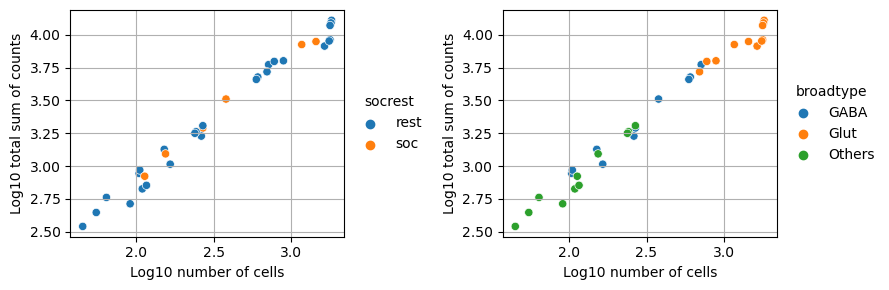

In [37]:
dp.plot_psbulk_samples(adata_dp, groupby=[headkey, 'broadtype'], 
                       figsize=(9, 3),
                      save=pathout+"/pseudobulk_"+headkey+".pdf")


### check pseudobulk profiles

In [38]:
pp_pdata = adata_dp.copy()
sc.pp.normalize_total(pp_pdata, target_sum=1e6)
sc.pp.log1p(pp_pdata)
sc.pp.scale(pp_pdata, max_value=10)
sc.tl.pca(pp_pdata, n_comps=10)

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


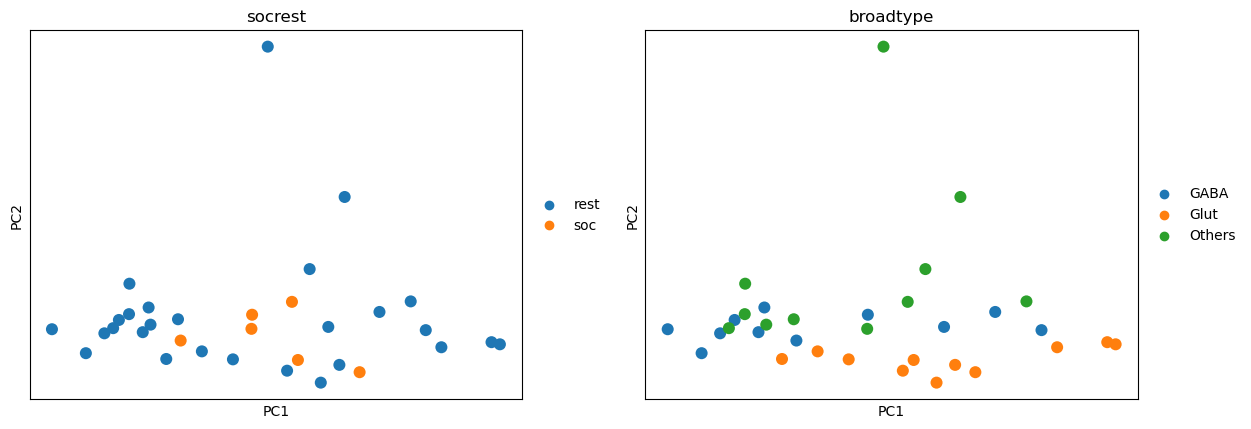

In [39]:
with plt.rc_context():
    sc.pl.pca(pp_pdata, color=[headkey, 'broadtype'], ncols=2, show=False, size=300)
    plt.savefig(pathout+"/top2PCs_"+headkey+".pdf")

### run DEG

In [40]:
# define contrast and control

if adata.obs[headkey].cat.categories[1] == "rest":
    strcontrol = adata.obs[headkey].cat.categories[1]
    strcontrast = adata.obs[headkey].cat.categories[0]
else:
    strcontrast = adata.obs[headkey].cat.categories[1]
    strcontrol = adata.obs[headkey].cat.categories[0]


title=strcontrast+"_compareto_"+strcontrol
print(title)

soc_compareto_rest


GABA


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.28 seconds.

Fitting dispersion trend curve...
... done in 0.07 seconds.

Fitting MAP dispersions...


Log2 fold change & Wald test p-value: socrest soc vs rest


... done in 0.19 seconds.

Fitting LFCs...
... done in 0.06 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.04 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700054A03Rik,52.824097,-0.148317,0.410911,-0.360947,0.718139,0.997423
1700126G02Rik,9.276643,-0.548050,0.437155,-1.253674,0.209960,0.997423
4930402H24Rik,3.581181,-0.707634,0.865316,-0.817775,0.413486,0.997423
4930441J16Rik,3.649297,-0.110632,0.791640,-0.139751,0.888857,0.997423
4930511M06Rik,7.935140,0.017628,0.445282,0.039587,0.968422,0.997423
...,...,...,...,...,...,...
mt-Nd2,16.228426,-0.164474,0.756859,-0.217312,0.827966,0.997423
mt-Nd3,11.394203,-0.161385,0.712784,-0.226414,0.820879,0.997423
mt-Nd4,15.204892,-0.639805,0.639171,-1.000992,0.316830,0.997423
mt-Nd4l,1.770162,-1.547293,2.216308,-0.698140,0.485090,0.997423


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: socrest soc vs rest


... done in 0.13 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700054A03Rik,52.824097,-1.028473e-06,0.001125,-0.360947,0.718139,0.997423
1700126G02Rik,9.276643,-3.160421e-06,0.001129,-1.253674,0.209960,0.997423
4930402H24Rik,3.581181,-9.837578e-07,0.001127,-0.817775,0.413486,0.997423
4930441J16Rik,3.649297,-1.795359e-07,0.001142,-0.139751,0.888857,0.997423
4930511M06Rik,7.935140,1.460565e-07,0.001144,0.039587,0.968422,0.997423
...,...,...,...,...,...,...
mt-Nd2,16.228426,-2.856525e-07,0.001131,-0.217312,0.827966,0.997423
mt-Nd3,11.394203,-3.199083e-07,0.001139,-0.226414,0.820879,0.997423
mt-Nd4,15.204892,-1.487586e-06,0.001108,-1.000992,0.316830,0.997423
mt-Nd4l,1.770162,-1.148227e-07,0.001080,-0.698140,0.485090,0.997423


Glut


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.32 seconds.

Fitting dispersion trend curve...
... done in 0.12 seconds.

Fitting MAP dispersions...


Log2 fold change & Wald test p-value: socrest soc vs rest


... done in 0.27 seconds.

Fitting LFCs...
... done in 0.05 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.04 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700054A03Rik,141.578125,0.039169,0.232242,0.168658,0.866066,0.99073
1700126G02Rik,34.365047,0.079889,0.238560,0.334881,0.737715,0.99073
4930402H24Rik,10.878186,0.015078,0.370653,0.040678,0.967552,0.99073
4930441J16Rik,14.087247,0.419952,0.398597,1.053577,0.292077,0.99073
4930511M06Rik,35.856548,-0.235002,0.261560,-0.898462,0.368939,0.99073
...,...,...,...,...,...,...
mt-Nd2,100.985840,-0.235509,0.438701,-0.536832,0.591384,0.99073
mt-Nd3,53.059940,-0.070564,0.510395,-0.138254,0.890040,0.99073
mt-Nd4,90.864548,-0.260503,0.547233,-0.476037,0.634048,0.99073
mt-Nd4l,10.592980,-0.085165,0.672676,-0.126606,0.899252,0.99073


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: socrest soc vs rest


... done in 0.12 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700054A03Rik,141.578125,7.575092e-07,0.001132,0.168658,0.866066,0.99073
1700126G02Rik,34.365047,1.463986e-06,0.001133,0.334881,0.737715,0.99073
4930402H24Rik,10.878186,-3.162671e-07,0.001129,0.040678,0.967552,0.99073
4930441J16Rik,14.087247,2.770264e-06,0.001147,1.053577,0.292077,0.99073
4930511M06Rik,35.856548,-3.613927e-06,0.001121,-0.898462,0.368939,0.99073
...,...,...,...,...,...,...
mt-Nd2,100.985840,-1.220961e-06,0.001115,-0.536832,0.591384,0.99073
mt-Nd3,53.059940,-2.752535e-07,0.001126,-0.138254,0.890040,0.99073
mt-Nd4,90.864548,-8.639384e-07,0.001113,-0.476037,0.634048,0.99073
mt-Nd4l,10.592980,-1.914775e-07,0.001132,-0.126606,0.899252,0.99073


Others


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.26 seconds.

Fitting dispersion trend curve...
... done in 0.08 seconds.

Fitting MAP dispersions...


Log2 fold change & Wald test p-value: socrest soc vs rest


... done in 0.19 seconds.

Fitting LFCs...
... done in 0.06 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 0.04 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700054A03Rik,16.898241,-0.373594,0.307563,-1.214690,0.224485,0.992697
1700126G02Rik,5.061245,-0.705507,0.787329,-0.896076,0.370212,0.992697
4930402H24Rik,1.548119,-1.418609,1.065500,-1.331402,0.183057,0.992697
4930441J16Rik,1.031466,1.918986,1.070131,1.793225,0.072937,0.992697
4930511M06Rik,4.604709,-0.712174,0.677466,-1.051233,0.293152,0.992697
...,...,...,...,...,...,...
mt-Nd2,5.778103,0.669230,0.672769,0.994741,0.319862,0.992697
mt-Nd3,5.118347,0.279820,1.110922,0.251881,0.801133,0.992697
mt-Nd4,8.384136,-0.060996,0.539200,-0.113123,0.909933,0.992697
mt-Nd4l,0.674138,-0.483893,1.952502,-0.247832,0.804264,0.992697


Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: socrest soc vs rest


... done in 0.15 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1700054A03Rik,16.898241,-4.265878e-06,0.001133,-1.214690,0.224485,0.992697
1700126G02Rik,5.061245,-1.135527e-06,0.001113,-0.896076,0.370212,0.992697
4930402H24Rik,1.548119,-1.442695e-01,0.113492,-1.331402,0.183057,0.992697
4930441J16Rik,1.031466,1.907805e-06,0.001240,1.793225,0.072937,0.992697
4930511M06Rik,4.604709,-1.697632e-06,0.001128,-1.051233,0.293152,0.992697
...,...,...,...,...,...,...
mt-Nd2,5.778103,1.592170e-06,0.001184,0.994741,0.319862,0.992697
mt-Nd3,5.118347,2.356215e-07,0.001168,0.251881,0.801133,0.992697
mt-Nd4,8.384136,-2.111179e-07,0.001148,-0.113123,0.909933,0.992697
mt-Nd4l,0.674138,-1.144000e-07,0.001141,-0.247832,0.804264,0.992697


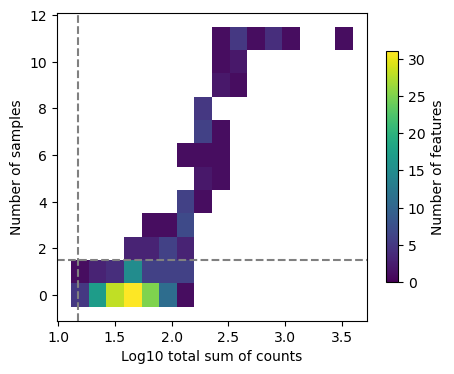

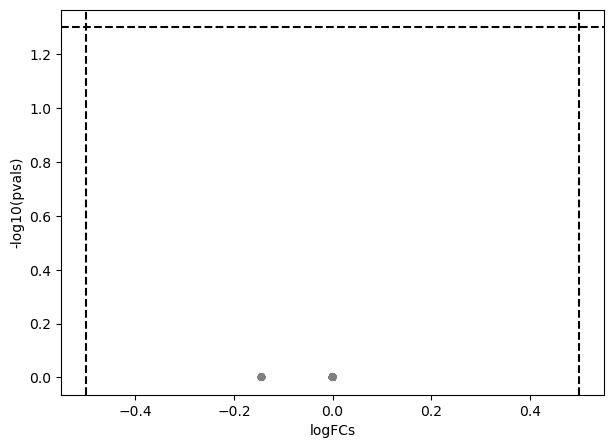

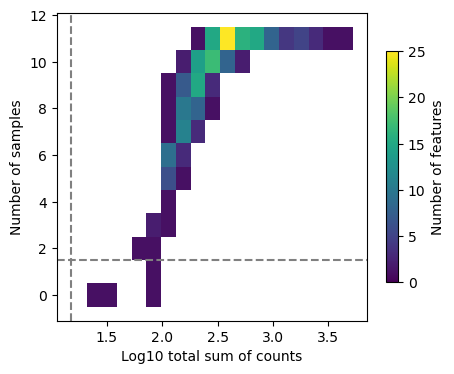

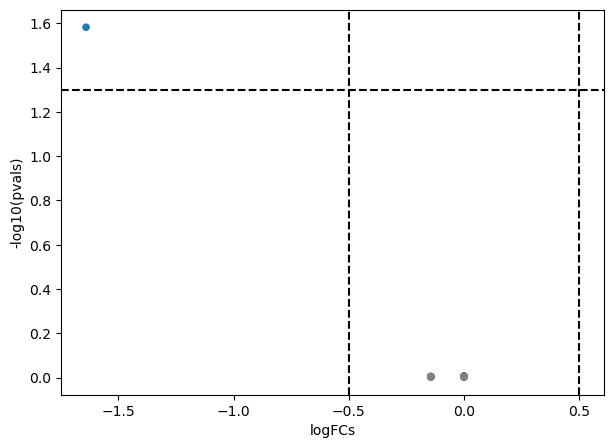

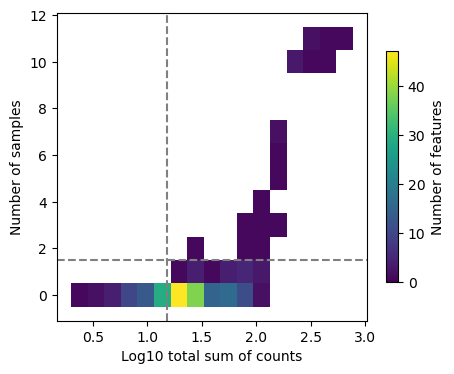

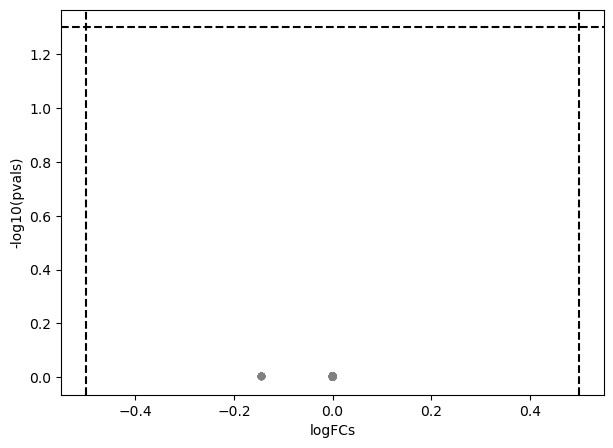

In [41]:
for i in adata.obs["broadtype"].cat.categories:
    print(i)
    
    try:
        # select cell profiles
	    tmp = adata_dp[adata_dp.obs['broadtype'] == i].copy()
	    # plot filter
	    dp.plot_filter_by_expr(tmp, group=headkey, 
	                       min_count=10, min_total_count=15,
	                       save=pathout+"/featureqc_"+title+"_"+i+".pdf")
	    
	    # Build DESeq2 object
	    dds = DeseqDataSet(
	        adata=tmp,
	        design_factors=headkey,
	        ref_level=[headkey,strcontrol],
	        refit_cooks=True,
	        n_cpus=8
	    )	

	    # Compute LFCs
	    dds.deseq2()
	    
	    # Extract contrast between two conditions
	    stat_res = DeseqStats(dds, 
	                          contrast=[headkey,strcontrast,strcontrol], 
	                          n_cpus=8)

	    # Compute Wald test
	    stat_res.summary()	

	    # Shrink LFCs
	    stat_res.lfc_shrink(coeff=headkey+'_'+strcontrast+'_vs_'+strcontrol)	

	    # Extract results
	    results_df = stat_res.results_df
        
        # global pvalue correction
	    results_df["pglobadj"]=results_df["padj"]*10
	    results_df=results_df.sort_values(by="pglobadj")
        
        # write csv
	    results_df.to_csv(pathout+"/DEGlist_"+title+"_"+i+".csv",index=True)
    
        # plot volcano
	    dp.plot_volcano_df(results_df, x='log2FoldChange', y='padj',top=0,
                          save=pathout+"/volcanoplot_"+title+"_"+i+".pdf")

    except ValueError:
        continue
